In [20]:
import re
import tomllib
from dataclasses import fields
from pathlib import Path
from typing import Literal

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.axes import Axes
from matplotlib.ticker import MultipleLocator

import seaborn as sns

from validation.geom_indices import GeomIndices

with open('config.toml', 'rb') as f:
    config = tomllib.load(f)

MPL_CONFIG = {
    "font.family": "Aptos",
    "font.size": "8",
    "axes.titlesize": "6",
    "axes.labelsize": "6",
    "xtick.labelsize": "6",
    "ytick.labelsize": "6",
    "legend.fontsize": "6",
    "axes.linewidth": .5,
    "lines.linewidth": .5,
    "xtick.major.size": 3,  # Increase major tick size for visibility
    "xtick.minor.size": 2,  # Set minor tick size
    "ytick.major.size": 3,
    "ytick.minor.size": 2,
    "xtick.major.width": 0.5,
    "ytick.major.width": 0.5,
    "xtick.minor.width": 0.3,
    "ytick.minor.width": 0.3,
    "xtick.color": "black",  # Specify tick color for visibility
    "ytick.color": "black",
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "savefig.bbox": "tight",
    "legend.frameon": False,
    "axes.grid": False,  # Enable grid globally if needed
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.bottom": False,
}
mpl.rcParams.update(MPL_CONFIG)

OUTPUT_DIR = Path(config['path']['validation_output_dir'])
FILENAME_PATTERN = r'^([a-z]+_[a-z]+)_([a-z]+)_batch([1-5])(?:_dissolved)?\.csv$'
GEOM_INDICES_LIST = [f.name for f in fields(GeomIndices)]
BINS = np.linspace(0, 1, 11)

In [21]:
def validate_output_filename(filename: str | Path,
                             filename_pattern=FILENAME_PATTERN):
    """Check if a filename matches the expected pattern."""
    if isinstance(filename, Path):
        filename = filename.name
    elif not isinstance(filename, str):
        raise TypeError("Filename must be a string or Path object.")
    return bool(re.match(filename_pattern, filename))


def _parse_output_filename(filename, flexible_pattern=FILENAME_PATTERN):
    """Parse filename using flexible regex and extract components."""
    match = re.match(flexible_pattern, filename)
    if match:
        geom_source = match.group(1)  # e.g., "llm_gadm", etc.
        benchmark = match.group(2)  # e.g., "gaul", "gdis"
        batch_number = int(match.group(3))
        dissolved = filename.endswith('_dissolved.csv')
        return geom_source, benchmark, batch_number, dissolved
    return None


def get_output_file_list(output_dir: str | Path):
    """Get a list of output files."""
    output_dir = Path(output_dir)
    output_files = [f.name for f in output_dir.glob('*.csv')]
    assert all([validate_output_filename(fn) for fn in output_files])
    return output_files


def get_output_files_metadata(output_list: list[str]):
    """Get a dataframe of output files metadata."""
    metadata = [_parse_output_filename(fn) for fn in output_list]
    return pd.DataFrame(
        index=output_list,
        columns=['geom_source', 'benchmark', 'batch_number', 'dissolved'],
        data=metadata
    )

def get_output_data(output_list: list[str],
                    output_dir: str | Path = OUTPUT_DIR):
    """Get a dataframe of output data."""
    output_data = pd.DataFrame()
    for fn in output_list:
        df_tmp = pd.read_csv(output_dir / fn)
        output_data = pd.concat([output_data, df_tmp], axis=0)
    return output_data.reset_index(drop=True)



In [22]:
output_file_list = get_output_file_list(OUTPUT_DIR)
output_files_metadata = get_output_files_metadata(output_file_list)
output_files_metadata

,geom_source,benchmark,batch_number,dissolved
llm_gadm_gaul_batch1.csv,llm_gadm,gaul,1,False
llm_gadm_gaul_batch1_dissolved.csv,llm_gadm,gaul,1,True
llm_gadm_gaul_batch2.csv,llm_gadm,gaul,2,False
llm_gadm_gaul_batch2_dissolved.csv,llm_gadm,gaul,2,True
llm_gadm_gaul_batch3.csv,llm_gadm,gaul,3,False
llm_gadm_gaul_batch3_dissolved.csv,llm_gadm,gaul,3,True
llm_gadm_gaul_batch4.csv,llm_gadm,gaul,4,False
llm_gadm_gaul_batch4_dissolved.csv,llm_gadm,gaul,4,True
llm_gadm_gaul_batch5.csv,llm_gadm,gaul,5,False
llm_gadm_gaul_batch5_dissolved.csv,llm_gadm,gaul,5,True


In [23]:
file_list_dissolved = [i for i in output_file_list if "dissolved" in i]
file_list_not_dissolved = [i for i in output_file_list if "dissolved" not in i]
output_data = get_output_data(file_list_not_dissolved)
output_data_dissolved = get_output_data(file_list_dissolved)
print(len(output_data))
print(len(output_data_dissolved))
# post-processing wiki data
output_data.loc[
    output_data['geom_type_a'] == 'llm_wiki',
    'a_in_b'
] = output_data.loc[output_data['geom_type_a'] == 'llm_wiki', 'b_contains_a'].astype(float)

153000
32679


In [24]:
output_data_dissolved.drop_duplicates(subset=['dis_no', 'geom_type_a', 'geom_type_b'], keep=False, inplace=True)

In [25]:
output_data[output_data['a_contains_b']]

,dis_no,name,admin_level,admin1,admin2,geom_type_a,geom_type_b,batch_number,area_calculation_method,area_a,area_b,intersection_area,union_area,a_in_b,b_in_a,jaccard,a_contains_b,b_contains_a,a_contains_b_properly,b_contains_a_properly
713,2000-0776-ARG,Santa Fe,Admin1,Santa Fe,NaN,llm_gadm,GAUL,1,geodetic,1.330970e+11,3.220332e+09,3.220332e+09,1.330970e+11,0.024195,1.0,0.024195,True,False,True,False
1289,2001-0395-COL,Antioquia,Admin1,Antioquia,NaN,llm_gadm,GAUL,1,geodetic,6.292609e+10,5.340310e+08,5.340310e+08,6.292609e+10,0.008487,1.0,0.008487,True,False,True,False
3018,2003-0115-TJK,Khatlon,Admin1,Khatlon,NaN,llm_gadm,GAUL,1,geodetic,2.388473e+10,3.374178e+08,3.374178e+08,2.388473e+10,0.014127,1.0,0.014127,True,False,True,False
3621,2003-0785-DZA,Adrar,Admin1,Adrar,NaN,llm_gadm,GAUL,1,geodetic,4.314955e+11,6.912975e+08,6.912975e+08,4.314955e+11,0.001602,1.0,0.001602,True,False,True,False
3748,2004-0146-CAN,Manitoba,Admin1,Manitoba,NaN,llm_gadm,GAUL,1,geodetic,6.498332e+11,2.414549e+09,2.414549e+09,6.498332e+11,0.003716,1.0,0.003716,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142631,2012-0178-TWN,Taiwan,Admin1,Fujian,NaN,llm_osm,GDIS,5,geodetic,9.118027e+10,1.501652e+09,1.501652e+09,9.118027e+10,0.016469,1.0,0.016469,True,False,True,False
142669,2012-0186-NPL,Gandaki Province,Admin1,Central,NaN,llm_osm,GDIS,5,geodetic,2.198127e+10,2.084848e+09,2.084848e+09,2.198127e+10,0.094847,1.0,0.094847,True,False,True,False
142709,2012-0321-PHL,Northern Mindanao,Admin1,Agusan del Norte,NaN,llm_osm,GDIS,5,geodetic,2.477357e+10,3.290306e+08,3.290306e+08,2.477357e+10,0.013282,1.0,0.013282,True,False,True,False
142710,2012-0321-PHL,Bukidnon,Admin2,Northern Mindanao,Valencia City,llm_osm,GDIS,5,geodetic,9.480962e+09,3.290306e+08,3.290306e+08,9.480962e+09,0.034704,1.0,0.034704,True,False,True,False


In [26]:
from itertools import product
combinations = list(product(output_data['geom_type_a'].unique(), output_data['geom_type_b'].unique()))
combinations

[('llm_gadm', 'GAUL'),
 ('llm_gadm', 'GDIS'),
 ('llm_osm', 'GAUL'),
 ('llm_osm', 'GDIS'),
 ('llm_wiki', 'GAUL'),
 ('llm_wiki', 'GDIS')]

llm_gadm vs GAUL
          dis_no        name admin_level      admin1 admin2 geom_type_a  \
0  1999-9388-DJI  Ali Sabieh      Admin1  Ali Sabieh    NaN    llm_gadm   
1  1999-9388-DJI      Dikhil      Admin1      Dikhil    NaN    llm_gadm   
2  1999-9388-DJI    Djibouti      Admin1   Djiboutii    NaN    llm_gadm   
3  1999-9388-DJI       Obock      Admin1       Obock    NaN    llm_gadm   
4  1999-9388-DJI   Tadjourah      Admin1    Tadjoura    NaN    llm_gadm   

  geom_type_b  batch_number area_calculation_method        area_a  \
0        GAUL             1                geodetic  2.328416e+09   
1        GAUL             1                geodetic  6.690660e+09   
2        GAUL             1                geodetic  1.955178e+08   
3        GAUL             1                geodetic  4.339481e+09   
4        GAUL             1                geodetic  6.658741e+09   

         area_b  intersection_area    union_area    a_in_b    b_in_a  \
0  2.166967e+10       2.210484e+09  2.178760e

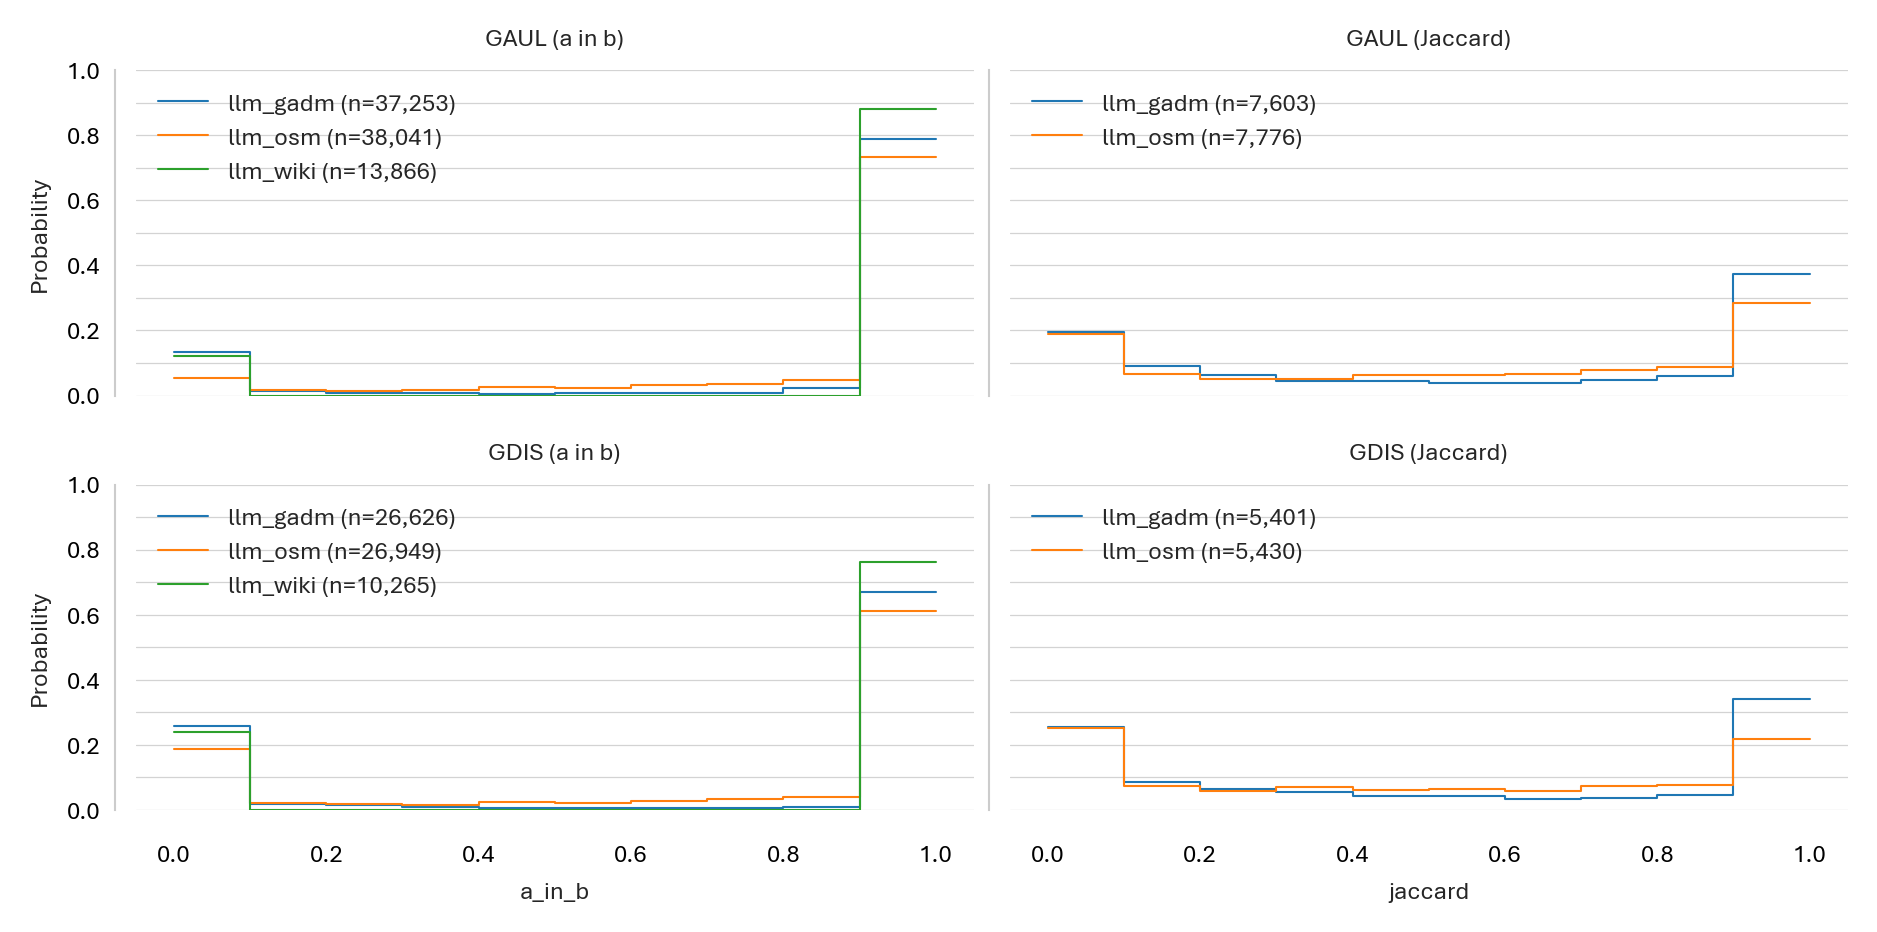

In [31]:
fig_row = {
    'GAUL': 0,
    'GDIS': 1
}

histplot_kwargs = {
    'element': 'step',
    'fill': False,
    'bins': BINS,
    'stat': 'probability'
}

fig, axes = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16/2.54, 8/2.54))

for source, benchmark in combinations:
    ax1, ax2 = axes[fig_row[benchmark], :]
    ax1.set_title(f"{benchmark} (a in b)")
    ax2.set_title(f"{benchmark} (Jaccard)")

    subset_data = output_data[(output_data['geom_type_a'] == source) & (output_data['geom_type_b'] == benchmark)]
    subset_data_dissolved = output_data_dissolved[(output_data_dissolved['geom_type_a'] == source) & (output_data_dissolved['geom_type_b'] == benchmark)]
    print(f"{source} vs {benchmark}")
    print(subset_data.head())

    sns.histplot(data=subset_data, x='a_in_b', ax=ax1, label=f'{source} (n={len(subset_data):,})', **histplot_kwargs)
    if source != 'llm_wiki':
        sns.histplot(data=subset_data_dissolved, x='jaccard', ax=ax2, label=f'{source} (n={len(subset_data_dissolved):,})', **histplot_kwargs)

def _format_ax(ax):
    ax.tick_params(
        axis='y',
        which='both',
        direction='in',
    )
    ax.yaxis.set_major_locator(MultipleLocator(.2))
    ax.yaxis.set_minor_locator(MultipleLocator(.1))
    ax.grid(which='both', axis='y', linestyle='-', linewidth=.3,
            color='lightgrey')
    ax.set_ylim((0, 1))
    ax.spines['left'].set_position(('outward', 5))
    ax.spines['bottom'].set_position(('outward', 2))
    return ax

for ax in axes.flatten():
    _format_ax(ax)
    ax.legend(loc='upper left', frameon=False,)

fig.tight_layout()

In [33]:
sel = output_data_dissolved[
    (output_data_dissolved['geom_type_a'] == 'llm_gadm') &
    (output_data_dissolved['geom_type_b'] == 'GAUL')
]
sel

,dis_no,name,admin_level,admin1,admin2,geom_type_a,geom_type_b,batch_number,area_calculation_method,area_a,area_b,intersection_area,union_area,a_in_b,b_in_a,jaccard,a_contains_b,b_contains_a,a_contains_b_properly,b_contains_a_properly
0,1999-9388-DJI,"['Ali Sabieh', 'Dikhil', 'Djibouti', 'Obock', ...","['Admin1', 'Admin1', 'Admin1', 'Admin1', 'Admi...","['Ali Sabieh', 'Dikhil', 'Djiboutii', 'Obock',...","[None, None, None, None, None]",llm_gadm,GAUL,1,geodetic,2.021281e+10,2.166967e+10,1.947171e+10,2.241078e+10,0.963335,0.898570,0.868855,False,False,False,False
1,1999-9388-SDN,"['Northern Darfur', 'Red Sea']","['Admin1', 'Admin1']","['North Darfur', 'Red Sea']","[None, None]",llm_gadm,GAUL,1,geodetic,5.337433e+11,7.566663e+11,5.136116e+11,7.767980e+11,0.962282,0.678782,0.661191,False,False,False,False
2,1999-9388-SOM,"['Bay', 'Hiraan', 'Ceel Barde', 'Rab Dhuure', ...","['Admin1', 'Admin1', 'Admin2', 'Admin2', 'Admi...","['Bay', 'Hiiraan', 'Bakool', 'Bakool', 'Bakool...","[None, None, 'Ceel Barde', 'Rab Dhuure', 'Tiye...",llm_gadm,GAUL,1,geodetic,1.238183e+11,1.245732e+11,1.232934e+11,1.250982e+11,0.995760,0.989726,0.985573,False,False,False,False
3,2000-0002-AGO,['Baia Farta'],['Admin2'],['Benguela'],['Baía Farta'],llm_gadm,GAUL,1,geodetic,6.858307e+09,1.086344e+10,6.739455e+09,1.098229e+10,0.982670,0.620379,0.613666,False,False,False,False
4,2000-0003-BGD,"['Barisal', 'Chittagong', 'Dhaka', 'Khulna', '...","['Admin1', 'Admin1', 'Admin1', 'Admin1', 'Admi...","['Barisal', 'Chittagong', 'Dhaka', 'Khulna', '...","[None, None, None, None, None, None, None]",llm_gadm,GAUL,1,geodetic,1.288496e+11,1.398251e+11,1.269261e+11,1.417486e+11,0.985072,0.907749,0.895431,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7606,2023-0459-IND,"['Maharashtra', 'Raigad']","['Admin1', 'Admin2']","['Maharashtra', 'Maharashtra']","[None, 'Pune']",llm_gadm,GAUL,5,geodetic,3.073389e+11,6.891241e+09,6.881454e+09,3.073487e+11,0.022390,0.998580,0.022390,False,False,False,False
7607,2023-0510-MNG,['Ulaanbaatar'],['Admin1'],['Ulaanbaatar'],[None],llm_gadm,GAUL,5,geodetic,4.531879e+09,4.735846e+09,4.054176e+09,5.213549e+09,0.894591,0.856062,0.777623,False,False,False,False
7608,2023-0524-USA,"['Hawaii', 'Maui']","['Admin1', 'Admin2']","['Hawaii', 'Hawaii']","[None, 'Maui']",llm_gadm,GAUL,5,geodetic,1.672429e+10,1.668433e+10,1.664465e+10,1.676397e+10,0.995238,0.997622,0.992882,False,False,False,False
7609,2023-0529-FRA,['Occitanie'],['Admin1'],['Occitanie'],[None],llm_gadm,GAUL,5,geodetic,7.327596e+10,4.141043e+09,4.093420e+09,7.332358e+10,0.055863,0.988500,0.055827,False,False,False,False


<Axes: >

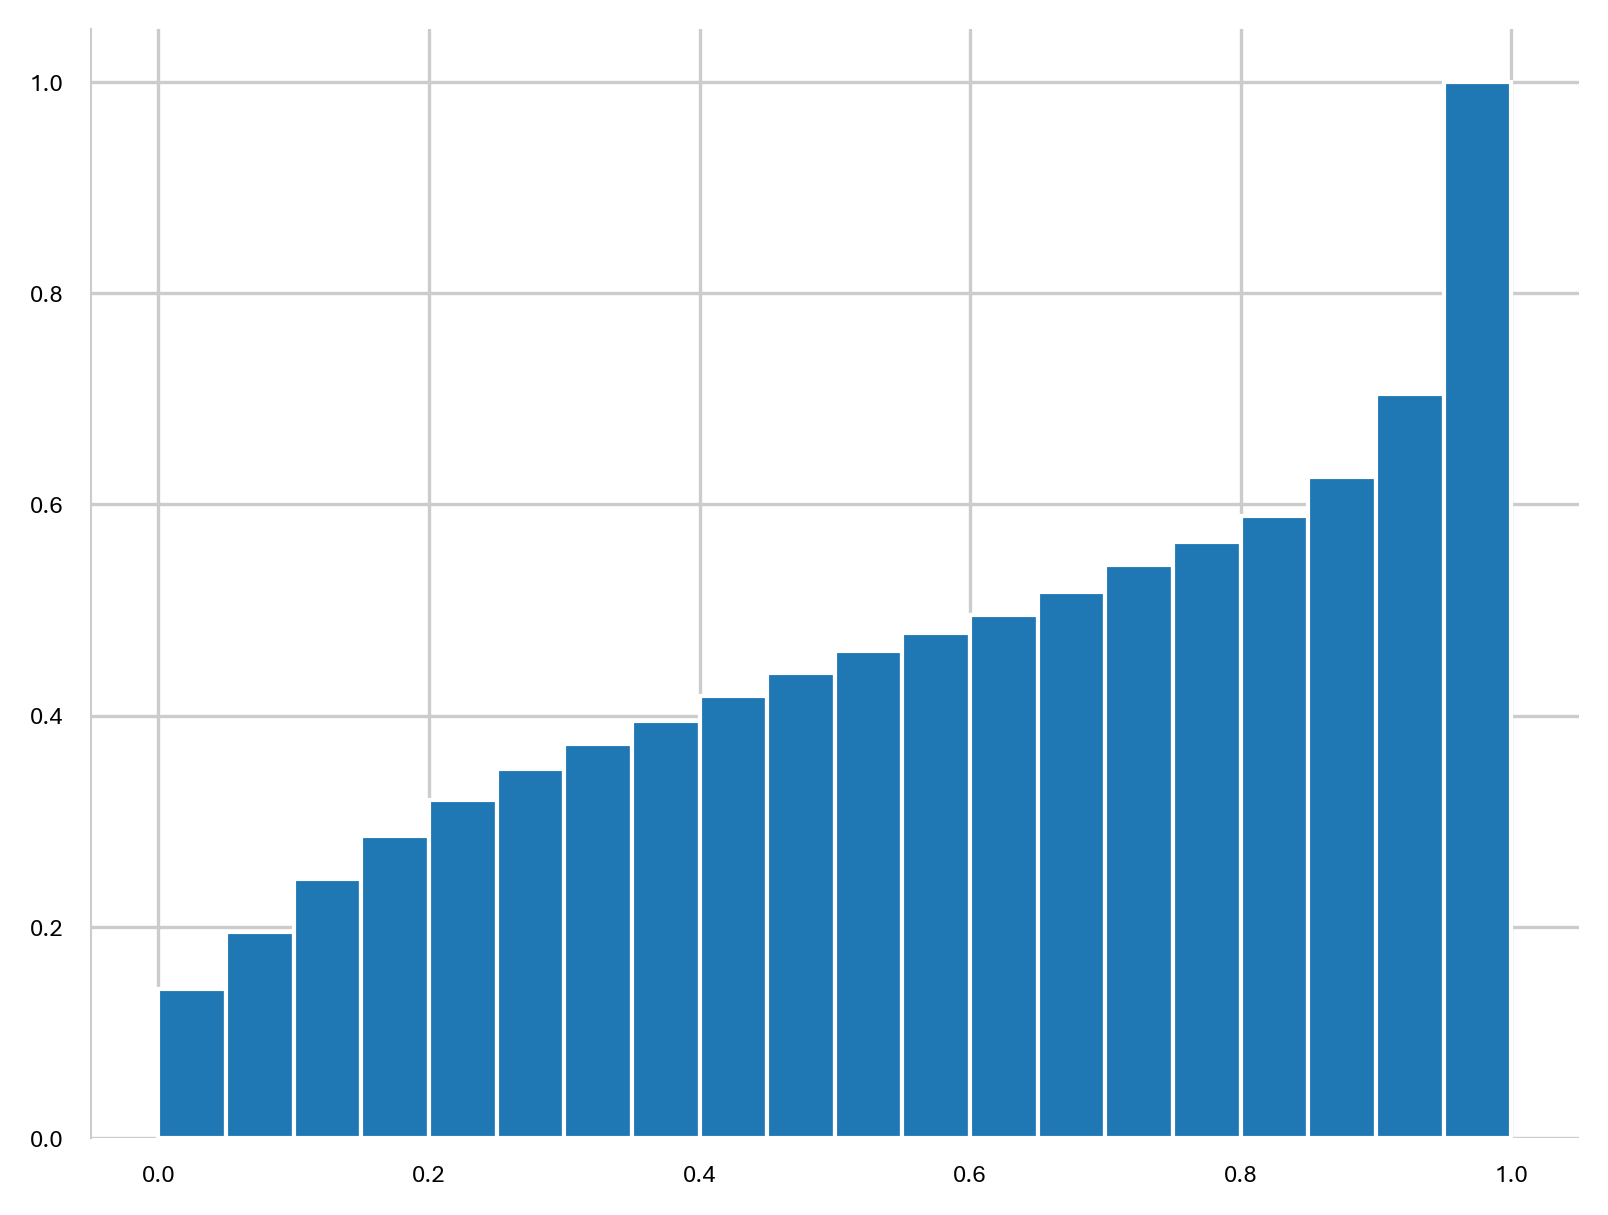

In [39]:
sel['jaccard'].hist(bins=20, density=True, cumulative=True)